# 自己増殖シラードエンジン(SPSE Self-Propagating Szilard Engine)

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# motivation

In [ ]:
ゆらぎが生物活動にもたらす重要性

シラードエンジンは微小な　分子サイズの熱ゆらぎのある系を観測し、
そのような観測された状態に応じて増殖率が変わるような物質を考える。その場合に


In [16]:
np.random.poisson(1, 1)[0]

1

In [3]:
np.random.poisson(1, 10)

array([0, 0, 0, 2, 3, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 2, 0, 2, 0,
       2, 3, 0, 1, 2, 1, 0, 2, 2, 3, 2, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1,
       4, 1, 0, 1, 0, 1, 0, 0, 2, 0, 3, 0, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 2, 3, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0, 1, 0,
       0, 0, 2, 0, 3, 0, 1, 0, 0, 3, 0, 1])

## model

2重ポテンシャル

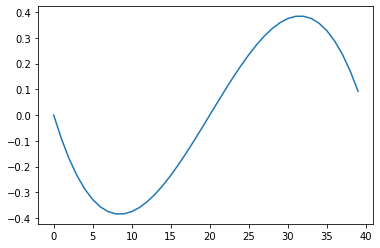

In [72]:
def f(x,a=1):
    y=x-a
    return -y*y*y+y

plt.plot([f((i)*0.05) for i in range(40)])

type S

$\cdot{L}=sx-\gamma_LL$

$\cdot{s}=AL-\gamma_ss$

$\cdot{x}=sf(x)+\epsilon_t$

type L

$\cdot{L}=sx-\gamma_LL$

$\cdot{s}=AL-\gamma_ss$

$\cdot{x}=Lf(x)+\epsilon_t$

type sin

$\cdot{L}=sx-\gamma_LL$

$\cdot{s}=-AL-\gamma_ss$

$\cdot{x}=Lf(x)+\epsilon_t$

type 2

$\cdot{s}=Ax-\gamma_ss$

$\cdot{x}=sf(x)+\epsilon_t$

In [87]:
def noise(ep):
    return ep*np.random.poisson(1,1)[0]   

def typeS(v,t,A,gammaL,gammas,ep=1):

    L,s,x= v
    dL=s*x-gammaL*L
    ds=A*L-gammas*s
#    print(s*f(x))
    dx = s*f(x)+noise(ep)
    return np.stack([dL,ds,dx])


def typeL(v,t,A,gammaL,gammas,ep=1):
    L,s,x= v
    dL=s*x-gammaL*L
    ds=A*L-gammas*s
    dx = L*f(x)+noise(ep)
    
    return np.stack([dL,ds,dx])

def type_sin(v,t,A,gammas,gammaL,ep=1):
    L,s,x= v
    dL=s*x-gammaL*L+1
    ds=-A*L-gammas*s+1
    dx = L*f(x)+noise(ep)
    
    return np.stack([dL,ds,dx])

    
def type2(v,t,A,gammas,ep=1):
    s,x= v
    ds=A*x-gammas*s
    dx = s*f(x)+noise(ep)
    
    return np.stack([dL,ds,dx])



## 固定点解析

L=constのとき


s=constの時



In [55]:
term = np.arange(700).astype(float)

type L

/home/xiangze/.local/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/tmp/ipykernel_347416/906273103.py:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(v_s), label=['L', 's', 'x'])
/tmp/ipykernel_347416/906273103.py:5: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(v_s), label=['L', 's', 'x'])


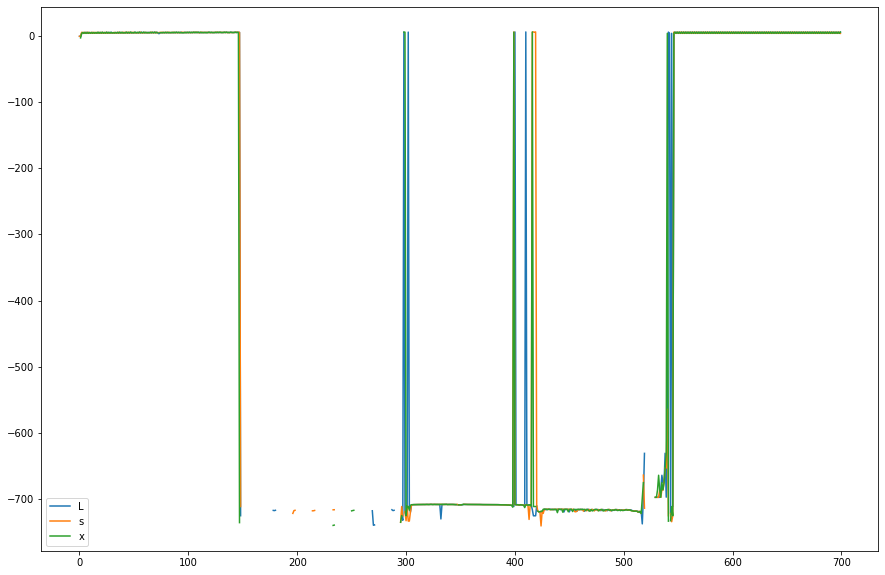

In [82]:
v_init = np.array([1.0, 1.0, .0])
v_s = odeint(typeL, v_init, term, (10,10,1))

plt.figure(figsize=(15,10))
plt.plot(np.log(v_s), label=['L', 's', 'x'])
plt.legend()

#plt.plot(v_s, label=['L', 's', 'x'])
#plt.legend()

/tmp/ipykernel_347416/364237678.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(v_s), label=['L', 's', 'x'])
/tmp/ipykernel_347416/364237678.py:2: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(v_s), label=['L', 's', 'x'])


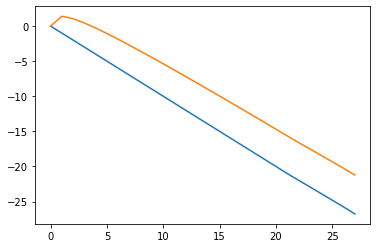

In [75]:
v_s = odeint(typeL, v_init, term, (10,1,1,0))
plt.plot(np.log(v_s), label=['L', 's', 'x'])

/home/xiangze/.local/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/tmp/ipykernel_347416/2205965253.py:9: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(v_s), label=['L', 's', 'x'])
/tmp/ipykernel_347416/2205965253.py:9: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(v_s), label=['L', 's', 'x'])


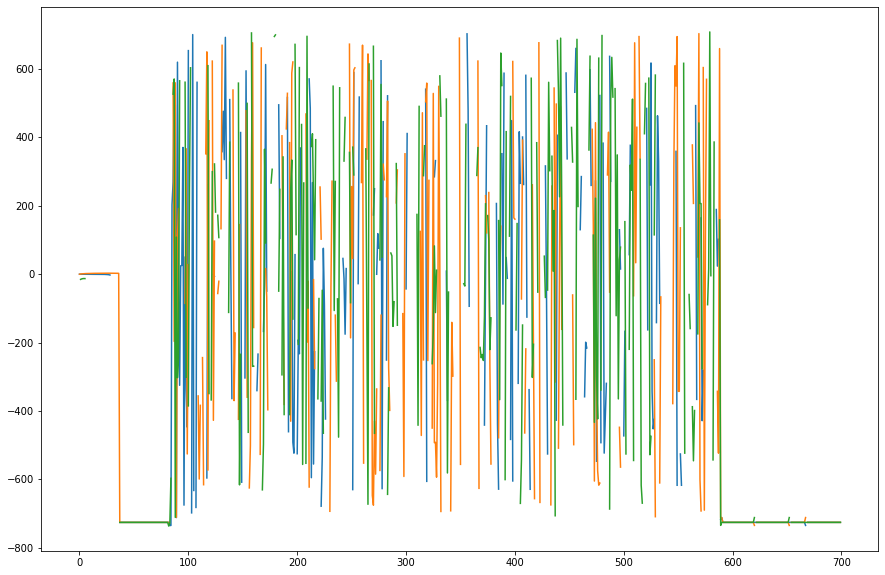

In [76]:
gammas=.01
gammasL=.01
A=1.

v_init = np.array([1.0, 1.0, .0])
v_s = odeint(typeS, v_init, term, (A,gammasL,gammas))

plt.figure(figsize=(15,10))
plt.plot(np.log(v_s), label=['L', 's', 'x'])

/tmp/ipykernel_347416/3813248819.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(v_s), label=['L', 's', 'x'])


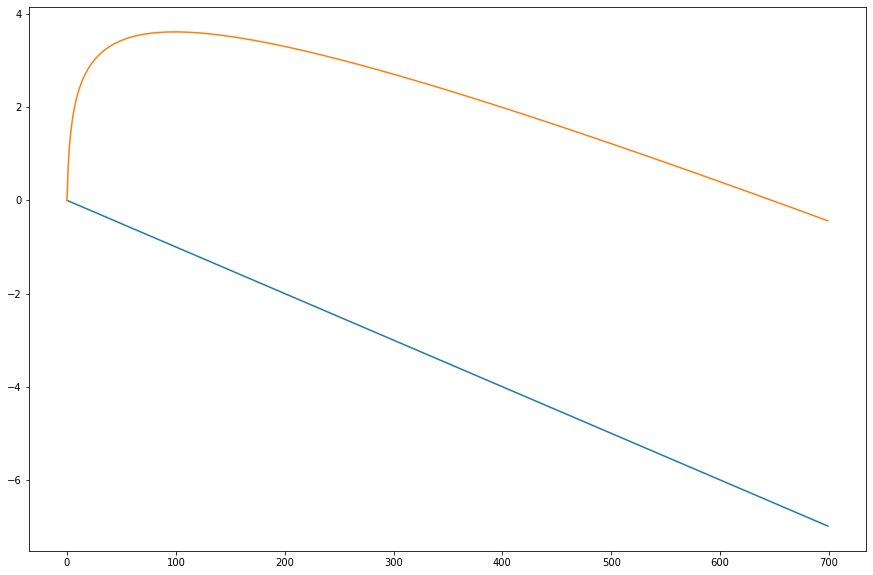

In [59]:
v_s = odeint(typeS, v_init, term, (A,gammasL,gammas,0))
plt.figure(figsize=(15,10))
plt.plot(np.log(v_s), label=['L', 's', 'x'])


/home/xiangze/.local/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/tmp/ipykernel_347416/3912087143.py:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(v_s), label=['L', 's', 'x'])
/tmp/ipykernel_347416/3912087143.py:5: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(v_s), label=['L', 's', 'x'])


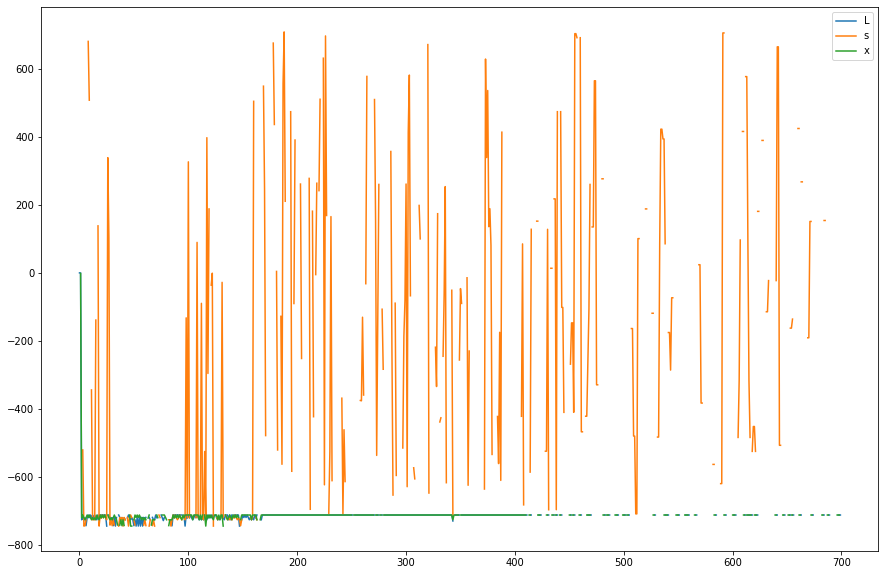

In [85]:
v_init = np.array([1.0, 1.0, .0])
v_s = odeint(type_sin, v_init, term, (10,10,1))

plt.figure(figsize=(15,10))
plt.plot(np.log(v_s), label=['L', 's', 'x'])
plt.legend()

/tmp/ipykernel_347416/2806604817.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(v_s), label=['L', 's', 'x'])
/tmp/ipykernel_347416/2806604817.py:4: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(v_s), label=['L', 's', 'x'])


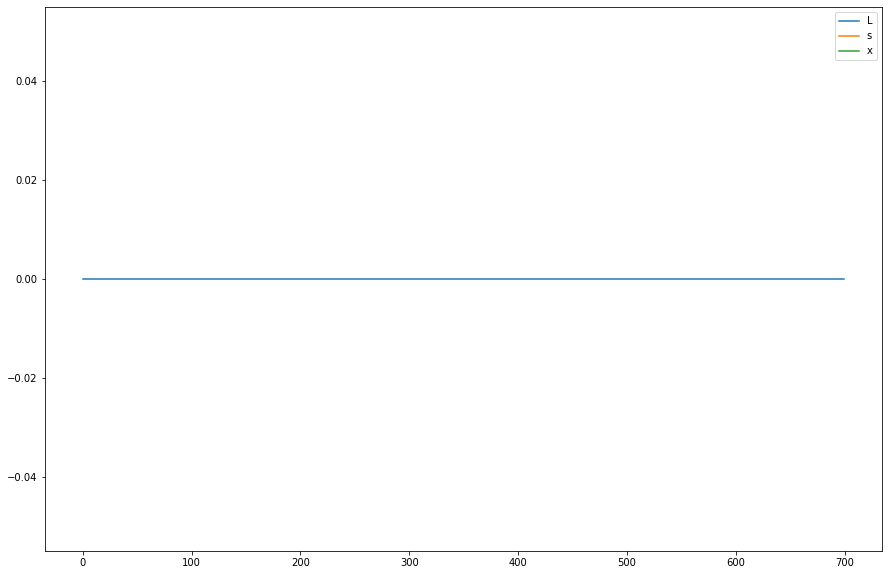

In [90]:
v_s = odeint(type_sin, v_init, term, (10,10,1,0))

plt.figure(figsize=(15,10))
plt.plot(np.log(v_s), label=['L', 's', 'x'])
plt.legend()